In [1]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from rasterio.plot import show

In [2]:
src = rasterio.open("/Users/aakashahamed/Downloads/snow17.tif")

Text(0.5,1,'Blue')

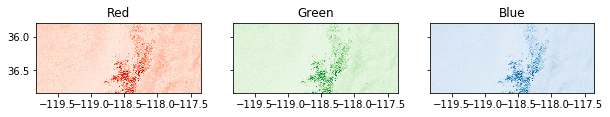

In [3]:
# RGB
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(10, 8), sharey=True)

# Plot Red, Green and Blue (rgb)
show((src, 4), cmap='Reds', ax=ax1)
show((src, 5), cmap='Greens', ax=ax2)
show((src, 6), cmap='Blues', ax=ax3)

# Add titles
ax1.set_title("Red")
ax2.set_title("Green")
ax3.set_title("Blue")


Text(0.5,1,'Thermal')

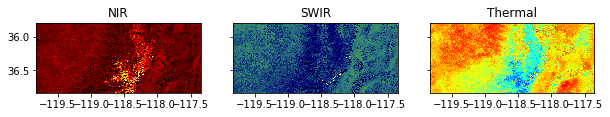

In [4]:
# NIR SWIR THERMAL
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, nrows=1, figsize=(10, 8), sharey=True)

show((src, 1), cmap='hot', ax=ax1)
show((src, 2), cmap='gist_earth', ax=ax2)
show((src, 3), cmap='jet', ax=ax3)

ax1.set_title("NIR")
ax2.set_title("SWIR")
ax3.set_title("Thermal")

In [5]:
# Read the grid values into numpy arrays
nir = src.read(1)
swir = src.read(2)
thermal = src.read(3)

red = src.read(4)
green = src.read(5)
blue = src.read(6)

In [6]:
# True Color RGB

# Function to normalize the grid values
def normalize(array):
    """Normalizes numpy arrays into scale 0.0 - 1.0"""
    array_min, array_max = np.nanmin(array), np.nanmax(array)
    return ((array - array_min)/(array_max - array_min))

# Normalize the bands
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

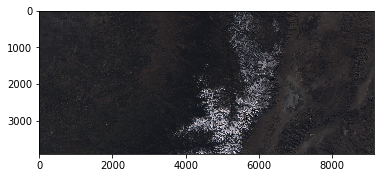

In [7]:
rgb = np.dstack((redn, greenn, bluen))

plt.imshow(rgb)

In [8]:
# Do a super naive classification for snowy pixels?

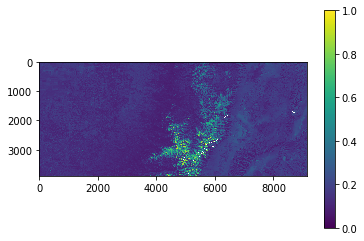

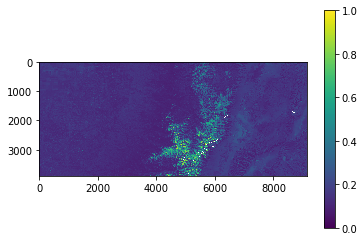

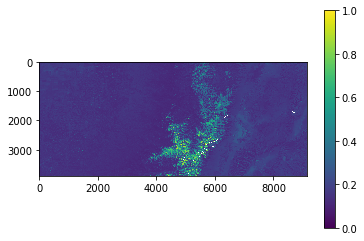

In [9]:
plt.imshow(rgb[:,:,0])
plt.colorbar()
plt.show()

plt.imshow(rgb[:,:,1])
plt.colorbar()
plt.show()

plt.imshow(rgb[:,:,2])
plt.colorbar()
plt.show()

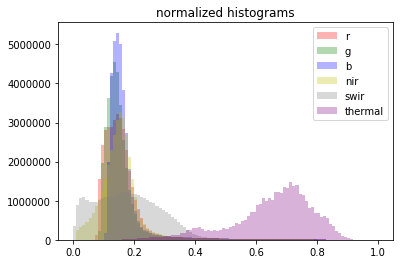

In [10]:
plt.hist(rgb[:,:,0][~np.isnan(rgb[:,:,0])], alpha = 0.3, bins = 100,color = "r", label = "r") 
plt.hist(rgb[:,:,1][~np.isnan(rgb[:,:,1])], alpha = 0.3, bins = 100,color = "g", label = "g") 
plt.hist(rgb[:,:,2][~np.isnan(rgb[:,:,2])], alpha = 0.3, bins = 100, color = "b", label = "b") 
plt.hist(normalize(nir[~np.isnan(nir)]), alpha = 0.3, bins = 100,color = "y", label = "nir") 
plt.hist(normalize(swir[~np.isnan(swir)]), alpha = 0.3, bins = 100,color = "gray", label = "swir") 
plt.hist(normalize(thermal[~np.isnan(thermal)]), alpha = 0.3, bins = 100, color = "purple", label = "thermal") 

plt.legend(loc='upper right')
plt.title("normalized histograms")

plt.show()

In [11]:
# Snow = less than freezing (270 K)

snow = np.where(np.nan_to_num(thermal) < 270, 1, 0)

In [23]:
# how much is snowy? 
snow.sum() / (snow.shape[0] * snow.shape[1])

0.035961012880491715

In [ ]:
# 3 % of this image is snow - covered. 

# The pixels are 30m x 30m. If you assume a 0.1m uniform snow depth across pixels, 
# can calculate snow volume like : 

In [27]:
vol = snow.sum() * 0.1 * 30**2 * 1e-9

In [ ]:
# Assuming 0.1m depth in snowy areas, there is 0.115 km^3 snow in this image. 

plt.figure(figsize = (15,10))

plt.title("2017 Snow = {} km^3 of snow (not SWE) assuming 0.1m uniform depth".format(round(vol,3) , size = 12))
plt.imshow(thermal, cmap = "jet")
plt.colorbar()
plt.axis("off")
plt.imshow(snow.reshape(thermal.shape), cmap = "gray", alpha = 0.5)
plt.tight_layout()